In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the original data
The dataset consists of 3 csv files -
 * **goalscorers.csv**, which contains all the goals scores in international football history
 * **results.csv**, which contains all the matches since 1876
 * **shootouts.csv** which contains all the penalty shoot-outs.

In [3]:
goals = pd.read_csv('data/goalscorers.csv')
matches = pd.read_csv('data/results.csv')
penalties = pd.read_csv('data/shootouts.csv')

Let us have a quick look at the data.

In [4]:
goals

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...
41003,2022-12-18,Argentina,France,Argentina,Ángel Di María,36.0,False,False
41004,2022-12-18,Argentina,France,France,Kylian Mbappé,80.0,False,True
41005,2022-12-18,Argentina,France,France,Kylian Mbappé,81.0,False,False
41006,2022-12-18,Argentina,France,Argentina,Lionel Messi,109.0,False,False


In [5]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False


In [6]:
penalties

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand
...,...,...,...,...
542,2022-12-05,Japan,Croatia,Croatia
543,2022-12-06,Morocco,Spain,Morocco
544,2022-12-09,Croatia,Brazil,Croatia
545,2022-12-09,Netherlands,Argentina,Argentina


Looking at the first two tables, I feel one more table can be formed by merging the two, which can be quite useful because then we will have all the goals in every match segregated at a place, instead of two different tables for the same purpose.

However, merging operations might lead to increase the number of missing values even further if there already are missing values in the dataframes. So, we need to check for and treat missing values before merging.

In [7]:
matches.isna().sum()    #counts missing values for each column

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [8]:
penalties.isna().sum()

date         0
home_team    0
away_team    0
winner       0
dtype: int64

Thankfully, **matches** and **penalties** tables do not have any missing values.

In [9]:
goals.isna().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       258
own_goal       0
penalty        0
dtype: int64

In [10]:
temp = goals[['scorer', 'minute']]
temp[temp['scorer'].isna()]   #to check if both columns intersect at missing values

,scorer,minute
8012,NaN,NaN
8013,NaN,NaN
8014,NaN,NaN
8015,NaN,NaN
8016,NaN,NaN
8017,NaN,NaN
8018,NaN,NaN
8019,NaN,NaN
8020,NaN,NaN
8021,NaN,NaN


Clearly, the <i>scorer</i> and <i>minute</i> columns have missing values, whenever <i>scorer</i> is missing, <i>minute</i> also is missing.
For once, we can go ahead and remove the respective rows but, I would want to lose as little data as possible because the dataset is already pretty small (just above 40k observations).

So, here is what I decided to do -
* Remove the rows with missing <i>scorer</i>, since these form merely 0.1 % of the dataset and it is impractical to set a dummy scorer name(that makes no sense, right?)
* Keep the rows where we have a <i>scorer</i> but <i>minute</i> is missing. Missing <i>minute</i>s can then be replaced by the mode of the <i>minute</i>s, i.e. the minute in which most goals are usually scored. This will preserve information as well as accuracy.

In [12]:
goals = goals.dropna(subset='scorer')
goals['scorer'].isna().sum()    #counting total NaN values in scorer

0

In [13]:
mode_of_minute = int(goals['minute'].mode())
goals['minute'] = goals['minute'].fillna(mode_of_minute)
goals.isna().sum()

date         0
home_team    0
away_team    0
team         0
scorer       0
minute       0
own_goal     0
penalty      0
dtype: int64

So, we have got rid of all the null values in the dataset. Let us now merge matches and goals to create our new dataframe, <i>all_goals</i>

In [14]:
all_goals = matches.merge(right=goals, left_on=['date', 'home_team', 'away_team'], right_on=['date', 'home_team', 'away_team'], how='inner' )
all_goals

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,0,4,Copa América,Buenos Aires,Argentina,True,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,6,1,Copa América,Buenos Aires,Argentina,False,Argentina,Alberto Ohaco,2.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40954,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Argentina,Ángel Di María,36.0,False,False
40955,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,France,Kylian Mbappé,80.0,False,True
40956,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,France,Kylian Mbappé,81.0,False,False
40957,2022-12-18,Argentina,France,3,3,FIFA World Cup,Lusail,Qatar,True,Argentina,Lionel Messi,109.0,False,False


Since, the goals data in the given dataset for the years from 1872 to 1916 is not available but the match data is, I have decided not to delete the matches table because it still has some extra data that is nowhere else and might be useful later on.

In [21]:
print('Shape of matches: {0}\nShape of goals: {1}\nShape of all_goals: {2}\nShape of penalties: {3}'.format(matches.shape, goals.shape, all_goals.shape, penalties.shape))

Shape of matches: (44557, 9)
Shape of goals: (40959, 8)
Shape of all_goals: (40959, 14)
Shape of penalties: (547, 4)


Clearly, the shapes are consistent and accurate. Let us begin exploratory analysis now, but before that let me just tweak around our <i>all_goals</i> dataframe to see if I can find something more interesting..

In [22]:
all_goals.describe()

,home_score,away_score,minute
count,40959.000000,40959.000000,40959.000000
mean,2.642472,1.582924,50.223174
std,2.462098,1.712146,26.447382
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,28.000000
50%,2.000000,1.000000,51.000000
75%,4.000000,2.000000,73.000000
max,31.000000,17.000000,122.000000


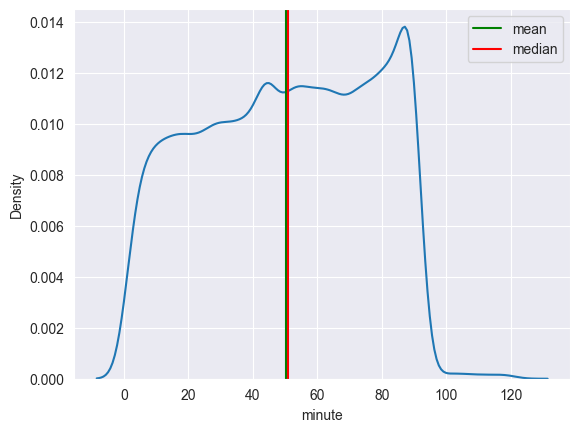

In [30]:
ax = sns.kdeplot(data=all_goals, x='minute')
ax.axvline(all_goals['minute'].mean(), color='g', label='mean')
ax.axvline(all_goals['minute'].median(), color='r', label='median')
ax.legend()